# import necessory libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# load the file

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usedCars.csv')

# EDA and preprocessing

In [3]:
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [4]:
df.tail()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
1059,588906,HYUNDAI,ELITE I20(2020-2020),ASTA O 1.2 BS VI,PETROL,White,42918,HATCHBACK,NaN,2020-09-01,2020,NaN,7.15 Lakhs,1st Owner,Rajasthan,K.S. Motors,Jaipur,1,8.3
1060,588945,HYUNDAI,XCENT(2017-2020),S,PETROL,White,78910,SEDAN,NaN,2019-01-01,2019,NaN,5.00 Lakhs,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.8
1061,588946,MAHINDRA,SCORPIO(2009-2014),VLX 2WD BS-III,DIESEL,White,76000,SUV,NaN,2013-05-01,2013,NaN,5.75 Lakhs,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,6.8
1062,588949,MARUTI SUZUKI,VITARA BREZZA,VDI,DIESEL,Silver,80120,HATCHBACK,NaN,2018-06-01,2018,NaN,7.71 Lakhs,1st Owner,Rajasthan,Rajasthan Car World,Jaipur,0,7.4
1063,588950,HONDA,CITY,SV MT DIESEL,DIESEL,Urban Titanium,77500,SEDAN,Manual,2014-01-01,2014,NaN,4.99 Lakhs,2nd Owner,Rajasthan,Rajasthan Car World,Jaipur,0,6.8


In [5]:
df.shape

(1064, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


In [7]:
df.describe()

,Id,Kilometer,ModelYear,Warranty,QualityScore
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,568156.542293,52807.187970,2016.864662,0.738722,7.770207
std,16438.139974,33840.296979,2.996786,0.439538,0.719717
min,525978.000000,101.000000,2003.000000,0.000000,0.000000
25%,555321.500000,32113.500000,2015.000000,0.000000,7.500000
50%,572753.000000,49432.000000,2017.000000,1.000000,7.800000
75%,583072.750000,68828.500000,2019.000000,1.000000,8.100000
max,589122.000000,640000.000000,2023.000000,1.000000,9.400000


In [8]:
df.isna().sum()

,0
Id,0
Company,0
Model,0
Variant,0
FuelType,1
Colour,0
Kilometer,0
BodyStyle,0
TransmissionType,714
ManufactureDate,0


In [9]:
# Fill missing FuelType with the most frequent value
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)

In [10]:
# Fill missing TransmissionType with mode or a placeholder like 'Unknown'
df['TransmissionType'].fillna(df['TransmissionType'].mode()[0], inplace=True)

In [11]:
df['CngKit'].fillna(df['CngKit'].mode()[0], inplace=True)

In [12]:
df.isna().sum()

,0
Id,0
Company,0
Model,0
Variant,0
FuelType,0
Colour,0
Kilometer,0
BodyStyle,0
TransmissionType,0
ManufactureDate,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.nunique()

,0
Id,1064
Company,23
Model,218
Variant,575
FuelType,5
Colour,76
Kilometer,1006
BodyStyle,10
TransmissionType,9
ManufactureDate,162


In [15]:
# Convert price strings to numeric values
def convert_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace(',', '').strip()
        if 'Lakhs' in price_str:
            return float(price_str.replace('Lakhs', '').strip()) * 100000
        else:
            return float(price_str)
    return np.nan

df['Price'] = df['Price'].apply(convert_price)

In [16]:
df.head(2)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,Manual,2018-02-01,2018,Company Fitted,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,Company Fitted,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3


In [17]:
# check the top 10 of 'main_brands':

model= df['Model'].value_counts()
model.head(10)

,count
Model,
SWIFT,38
CITY,38
BALENO,37
CRETA,30
ECOSPORT,28
AMAZE,26
GRAND I10,25
JAZZ,22
VITARA BREZZA,22


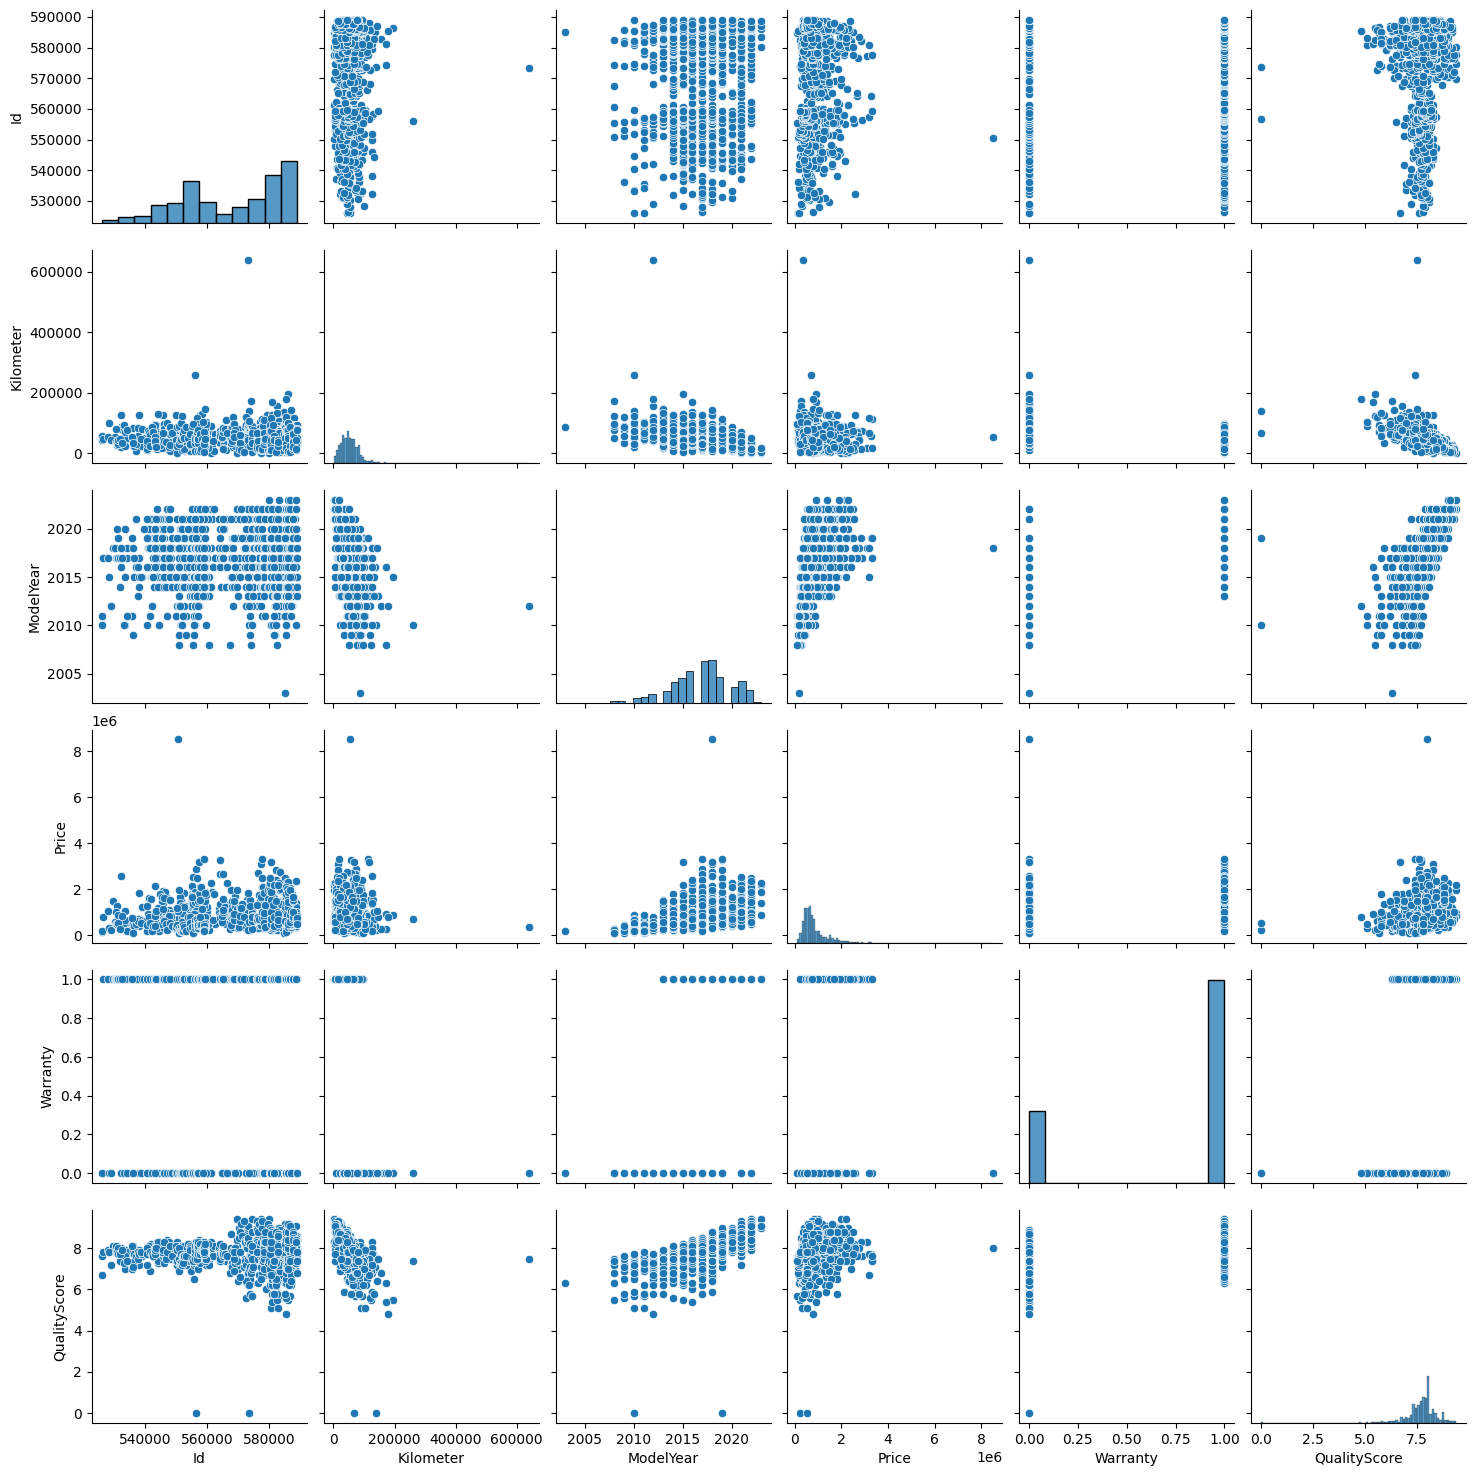

In [18]:
sns.pairplot(df)

<Axes: >

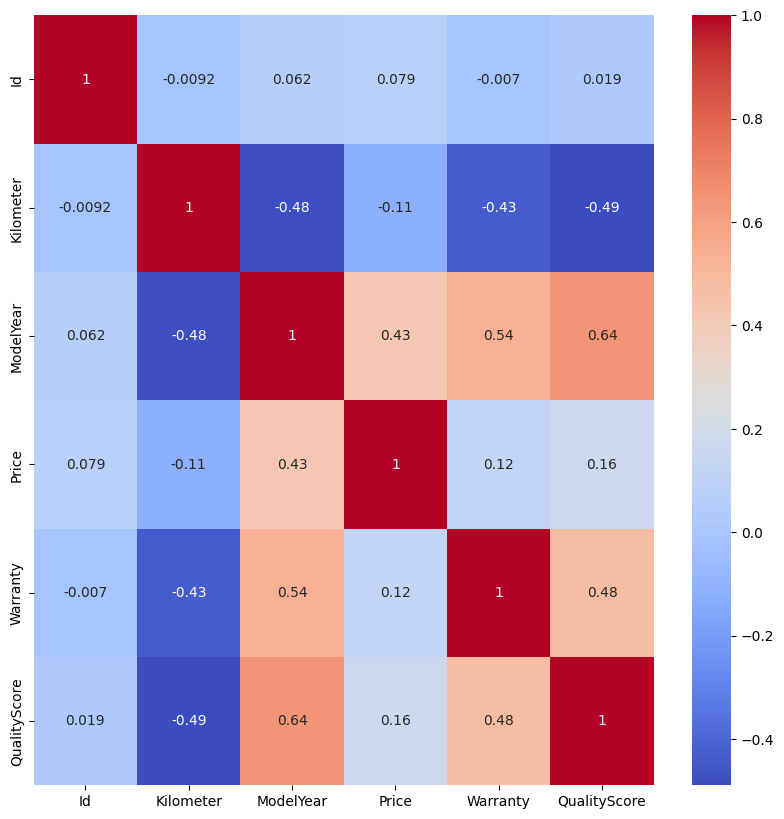

In [19]:
# correlation heatmap
co = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(co,annot=True,cmap='coolwarm')

In [20]:
df.dtypes

,0
Id,int64
Company,object
Model,object
Variant,object
FuelType,object
Colour,object
Kilometer,int64
BodyStyle,object
TransmissionType,object
ManufactureDate,object


<Axes: xlabel='Model'>

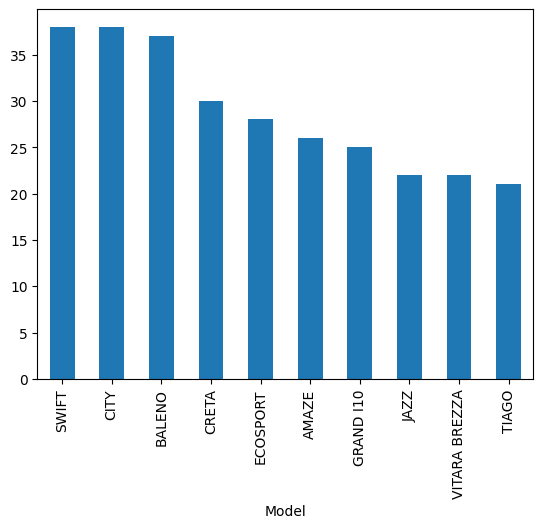

In [21]:
df['Model'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='Variant'>

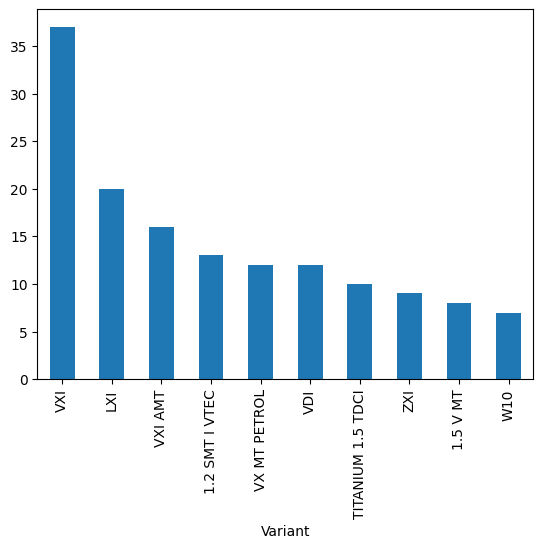

In [22]:
df['Variant'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='Colour'>

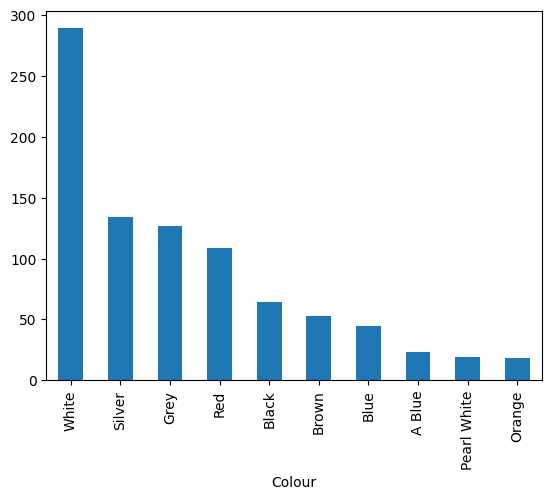

In [23]:
df['Colour'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='TransmissionType'>

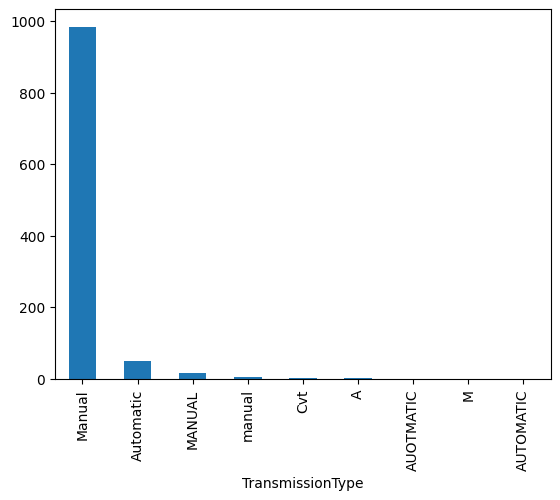

In [24]:
df['TransmissionType'].value_counts().plot(kind='bar')

<Axes: xlabel='FuelType'>

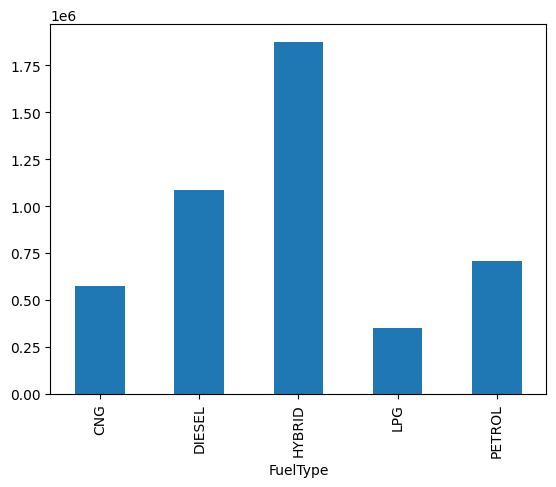

In [25]:
df.groupby('FuelType')['Price'].mean().plot(kind='bar')

<Axes: xlabel='Model'>

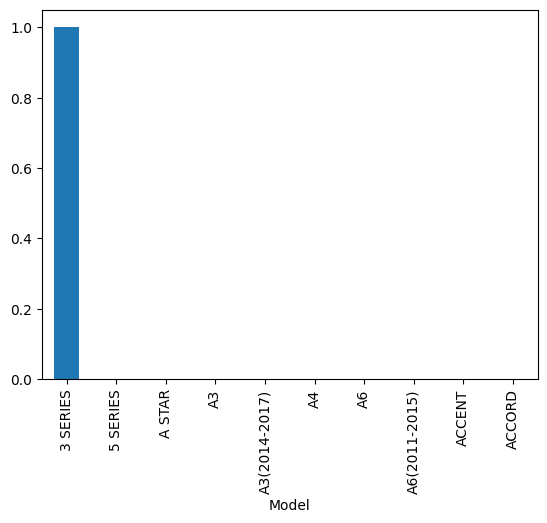

In [26]:
df.groupby('Model')['Warranty'].mean().head(10).plot(kind='bar')

<Axes: xlabel='Kilometer'>

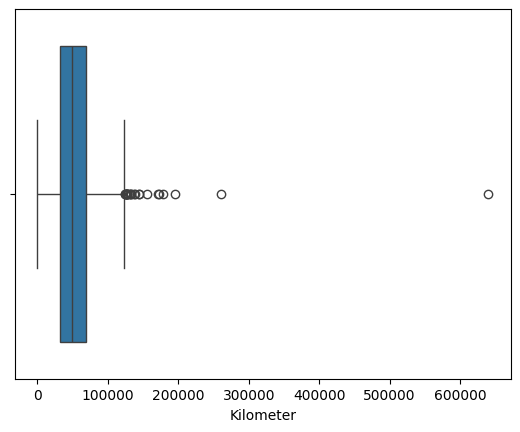

In [27]:

sns.boxplot(x=df['Kilometer'])

<Axes: xlabel='ModelYear'>

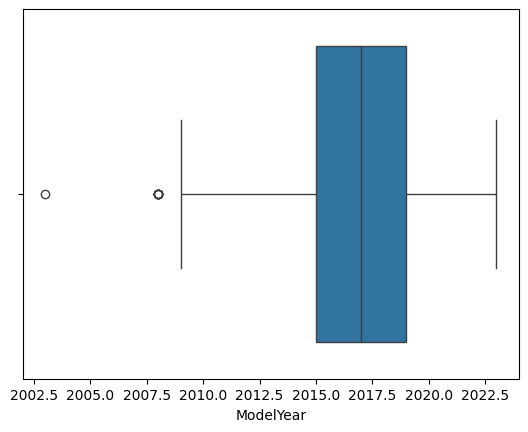

In [28]:
sns.boxplot(x=df['ModelYear'])

<Axes: xlabel='Price'>

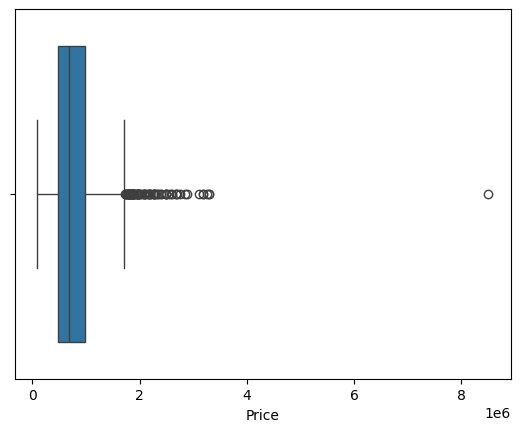

In [29]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='QualityScore'>

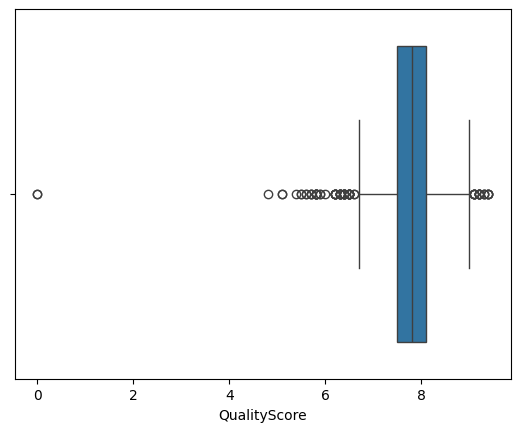

In [30]:
sns.boxplot(x=df['QualityScore'])

In [31]:
columns= ['Kilometer', 'ModelYear', 'Price', 'QualityScore']

def remove_outliers_iqr(df, columns):
    """
    Removes outliers from specified columns using the IQR method.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df

df_cleaned = remove_outliers_iqr(df, columns)

# Optional: Check new shape
print("Original shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)

Original shape: (1064, 19)
After removing outliers: (892, 19)


In [32]:
df.dtypes

,0
Id,int64
Company,object
Model,object
Variant,object
FuelType,object
Colour,object
Kilometer,int64
BodyStyle,object
TransmissionType,object
ManufactureDate,object


In [33]:

from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
df['Company']= le.fit_transform(df['Company'])

In [36]:
df['Model']= le.fit_transform(df['Model'])

In [37]:
df['Variant']= le.fit_transform(df['Variant'])


In [38]:
df['FuelType']= le.fit_transform(df['FuelType'])

In [39]:
df['Colour']= le.fit_transform(df['Colour'])

In [40]:
df['BodyStyle']= le.fit_transform(df['BodyStyle'])

In [41]:
df['TransmissionType']= le.fit_transform(df['TransmissionType'])

In [42]:
df['Owner']= le.fit_transform(df['Owner'])

In [43]:
df['DealerState']= le.fit_transform(df['DealerState'])

In [44]:
df['DealerName']= le.fit_transform(df['DealerName'])

In [45]:
df['City']= le.fit_transform(df['City'])

In [46]:
df.dtypes


,0
Id,int64
Company,int64
Model,int64
Variant,int64
FuelType,int64
Colour,int64
Kilometer,int64
BodyStyle,int64
TransmissionType,int64
ManufactureDate,object


In [47]:
# dropping unesessroy columns
df = df.drop(['Id','CngKit','ManufactureDate'], axis=1)

In [48]:
#separating feature variables and target variables
X=df.drop(['Price'],axis=1)
y=df['Price']

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

#spliting the data into training and testing set

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model selection

1. Linear Regression- It’s the simplest and most interpretable model — a good starting point for any regression task.

2. Decision Tree Regressor- Handles non-linear relationships and categorical data better than linear models.

3. Random Forest Regressor- It’s an ensemble of decision trees that gives better performance and stability.

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
LR=LinearRegression()

In [55]:
LR.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred=LR.predict(X_test)

In [57]:
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'R2 Score': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred)
}

print(metrics)

{'MSE': 136450079975.21292, 'R2 Score': 0.4296592286067842, 'MAE': 254166.56493095818}


# Decision Tree Regression

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
DT=DecisionTreeRegressor(random_state=42)

In [60]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
y_pred=DT.predict(X_test)

In [62]:
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'R2 Score': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred)
}

print(metrics)

{'MSE': 89924422535.21127, 'R2 Score': 0.6241294653316538, 'MAE': 198882.62910798122}


# Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
RF=RandomForestRegressor(random_state=42)

In [65]:
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [66]:
y_pred=RF.predict(X_test)

In [67]:
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'R2 Score': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred)
}

print(metrics)

{'MSE': 74630488559.15492, 'R2 Score': 0.6880558045696039, 'MAE': 175907.27699530518}


# hypertuning the models

# decision tree

In [68]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

In [69]:
dt_params = {
    'max_depth': np.arange(2, 20),             # limit tree depth
    'min_samples_split': [2, 5, 10, 20],        # min samples to split
    'min_samples_leaf': [1, 2, 4, 10],          # min leaf size
    'max_features': ['sqrt', 'log2', None]      # feature selection strategy
}

In [70]:
dt_random = RandomizedSearchCV(dt, dt_params, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
dt_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='r2')

In [71]:
dt_best = dt_random.best_estimator_

In [72]:
y_pred = dt_best.predict(X_test)

In [73]:
print("Decision Tree R² (tuned):", r2_score(y_test, y_pred))
print("Best DT params:", dt_random.best_params_)

Decision Tree R² (tuned): 0.596373986228773
Best DT params: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': np.int64(16)}


# random forest

In [74]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [75]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [76]:
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='r2')

In [77]:
rf_best = rf_random.best_estimator_

In [78]:
y_pred = rf_best.predict(X_test)

In [79]:
print("Random Forest R² (tuned):", r2_score(y_test, y_pred))
print("Best RF params:", rf_random.best_params_)

Random Forest R² (tuned): 0.6307256391996315
Best RF params: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}


# comparision chart

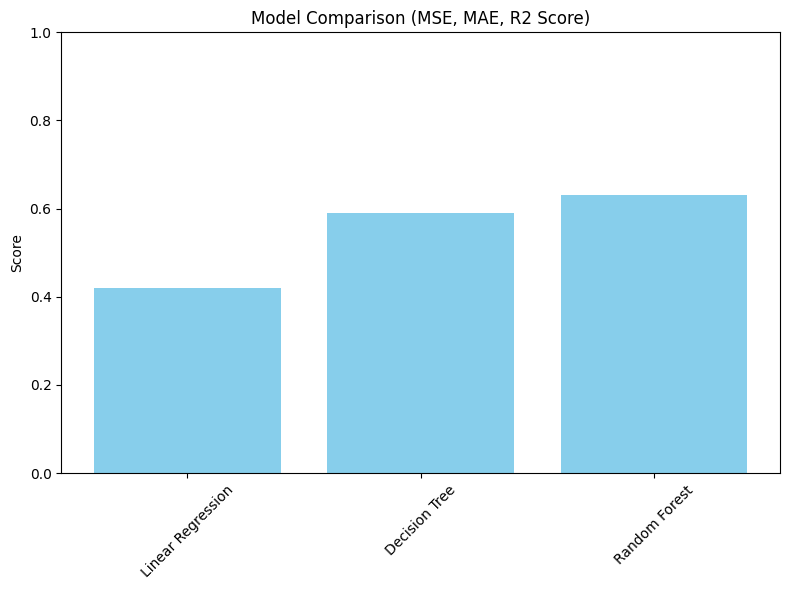

In [80]:
# Sample data
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
scores = [0.42, 0.59, 0.63]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Comparison (MSE, MAE, R2 Score)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# conclusion

Among all the three Algorithm we have trained Random Forest Regressor have best R2 score so for this data we will go with Random Forest Regressor

# save the model

In [81]:
import joblib


joblib.dump(RF, 'usedcar_model.pkl')


['usedcar_model.pkl']

In [82]:
from joblib import dump

# Save the trained label encoder
dump(le, 'label_encoder.joblib')


['label_encoder.joblib']